<a href="https://colab.research.google.com/github/provincit/python_ml_playground/blob/master/Clustering_using_NLTK_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('names')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def letters_only(astr):
  return astr.isalpha()





[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

cv = CountVectorizer(stop_words = "english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

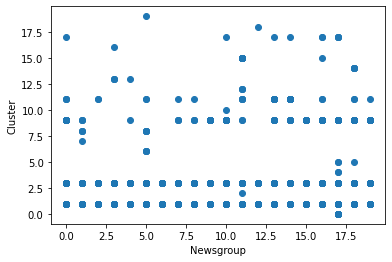

In [3]:
for post in groups.data:
  cleaned.append(' '.join([
    lemmatizer.lemmatize(word.lower())
    for word in post.split()
    if letters_only(word)
    and word not in all_names]))

transformed = cv.fit_transform(cleaned)
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()
